In [1]:
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32)
Y = torch.tensor(iris.target, dtype=torch.int32)
dataset = torch.utils.data.TensorDataset(X, Y)
data_iter = torch.utils.data.DataLoader(dataset, 30, shuffle=True)

In [3]:
def softmax(X):
    X_exp = torch.exp(X)
    return X_exp / X_exp.sum(1, keepdim=True) 

In [4]:
x = torch.normal(0, 1, (3, 4))
x_prob = softmax(x)
x_prob, x_prob.sum(1)

(tensor([[0.3006, 0.2208, 0.4534, 0.0253],
         [0.2512, 0.2476, 0.4434, 0.0578],
         [0.1174, 0.6071, 0.1002, 0.1753]]),
 tensor([1.0000, 1.0000, 1.0000]))

In [5]:
num_inputs = 4
num_outputs = 3
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [8]:
def softmax_forward(X):
    global W, b
    return softmax(torch.matmul(X, W) + b)

In [9]:
softmax_forward(X)

tensor([[0.3541, 0.3147, 0.3312],
        [0.3532, 0.3149, 0.3320],
        [0.3525, 0.3161, 0.3314],
        [0.3525, 0.3159, 0.3316],
        [0.3538, 0.3152, 0.3310],
        [0.3563, 0.3130, 0.3307],
        [0.3527, 0.3163, 0.3310],
        [0.3539, 0.3147, 0.3313],
        [0.3516, 0.3166, 0.3318],
        [0.3532, 0.3149, 0.3318],
        [0.3553, 0.3136, 0.3311],
        [0.3536, 0.3152, 0.3312],
        [0.3527, 0.3154, 0.3319],
        [0.3505, 0.3180, 0.3315],
        [0.3560, 0.3132, 0.3308],
        [0.3571, 0.3130, 0.3300],
        [0.3554, 0.3140, 0.3306],
        [0.3543, 0.3146, 0.3312],
        [0.3569, 0.3120, 0.3311],
        [0.3547, 0.3147, 0.3307],
        [0.3556, 0.3128, 0.3316],
        [0.3548, 0.3144, 0.3308],
        [0.3518, 0.3176, 0.3306],
        [0.3552, 0.3133, 0.3315],
        [0.3542, 0.3145, 0.3313],
        [0.3539, 0.3140, 0.3321],
        [0.3546, 0.3142, 0.3313],
        [0.3546, 0.3141, 0.3313],
        [0.3543, 0.3142, 0.3315],
        [0.353

In [10]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]).mean()

In [11]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y], cross_entropy(y_hat, y)

(tensor([0.1000, 0.5000]), tensor(1.4979))

In [12]:
def sgd():
    global W, b, lr, batch_size

    with torch.no_grad():
        # 更新参数时不更新梯度, 所以是no_grad
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_()
        b.grad.zero_()

In [13]:
lr = 0.01

In [14]:
loss_history = []
for epoch in range(100):
    for X, y in data_iter:
        y_hat = softmax_forward(X)
        loss = cross_entropy(y_hat, y)
        loss.backward()
        sgd()
        print(f"\r epoch {epoch} loss = {loss}", end='')
        loss_history.append(loss.detach().numpy())

 epoch 99 loss = 0.43188348412513733

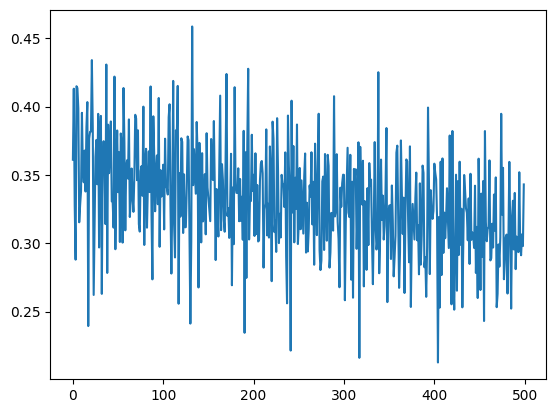

In [26]:
plt.plot(np.arange(len(loss_history)), loss_history)
plt.show()

In [35]:
Y_hat = softmax_forward(torch.tensor(iris.data, dtype=torch.float32))
Y_hat

tensor([[9.5828e-01, 4.1598e-02, 1.2196e-04],
        [9.1682e-01, 8.2795e-02, 3.8941e-04],
        [9.4435e-01, 5.5388e-02, 2.5723e-04],
        [9.1191e-01, 8.7468e-02, 6.2454e-04],
        [9.6321e-01, 3.6674e-02, 1.1428e-04],
        [9.5934e-01, 4.0517e-02, 1.4034e-04],
        [9.4789e-01, 5.1790e-02, 3.2262e-04],
        [9.4325e-01, 5.6527e-02, 2.2275e-04],
        [9.0015e-01, 9.9002e-02, 8.5291e-04],
        [9.1727e-01, 8.2367e-02, 3.6340e-04],
        [9.6383e-01, 3.6088e-02, 7.8481e-05],
        [9.3199e-01, 6.7633e-02, 3.8068e-04],
        [9.1849e-01, 8.1146e-02, 3.6767e-04],
        [9.4656e-01, 5.3156e-02, 2.8028e-04],
        [9.8611e-01, 1.3879e-02, 1.1126e-05],
        [9.8587e-01, 1.4107e-02, 2.0831e-05],
        [9.7896e-01, 2.0999e-02, 4.2470e-05],
        [9.5692e-01, 4.2930e-02, 1.4600e-04],
        [9.5632e-01, 4.3586e-02, 9.8079e-05],
        [9.6636e-01, 3.3530e-02, 1.1224e-04],
        [9.2529e-01, 7.4459e-02, 2.4628e-04],
        [9.6015e-01, 3.9688e-02, 1

> 1223

In [36]:
result = torch.argmax(Y_hat, 1)
result

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

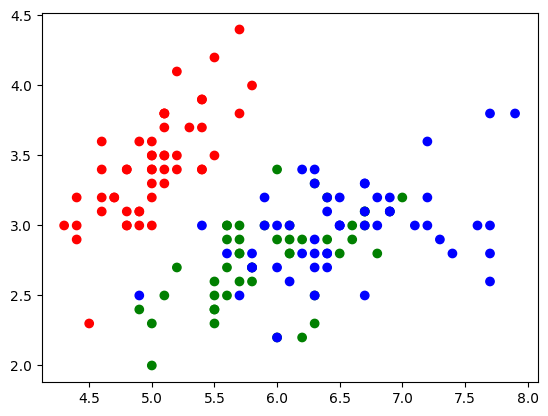

In [38]:
colors = np.where(result == 0, 'r', 'g')
colors = np.where(result == 1, 'g', colors)
colors = np.where(result == 2, 'b', colors)
data = np.array(iris.data)
plt.scatter(data[:, 0], data[:, 1], color=colors)
plt.show()

In [42]:
accuracy = np.sum(np.where(result.numpy() == iris.target, 1, 0)) / 150
accuracy

0.98